# Task 1 : measurement - Cyrille STROESSER

You need:
* `traceLength.txt`: how many samples per trace (one decimal number)
* `traces.bin`: raw measured traces, one byte per sample (uint8), all traces together continuously

There should be also PT and CT files
* `plaintext.txt`: all PT blocks, (one block per line, in hex, bytes separated by spaces)
* `ciphertext.txt`: all CT blocks, (one block per line, in hex, bytes separated by spaces)

And a screenshot and scope config files

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import os
from trace_utils import read_trace_length, load_text, load_traces

In [33]:
# Read trace length
trace_length = read_trace_length("traceLength.txt")
print(f"{trace_length = }")

# Select vertical slice of traces to load
tr_start = 80000
tr_len = 980000 - tr_start

# Load all traces, specified slice of each
traces = load_traces("traces.bin", trace_length, tr_start, tr_len)

# convert trace matrix to floats to prevent potential overflows
traces = traces.astype('float32')

# if you do not need the DC offset, you can remove it by subtracting the mean of each trace
# (but do not subtract it if you need it for average current computation)
# traces = traces - np.mean(traces, axis=1, keepdims=True)

print(f"Loaded traces have shape {traces.shape}") # dimensions of matrix of traces

trace_length = 1031250
Traces file traces.bin assumed shape (500 x 1031250)
Reading all 500 traces, each from 80000, length 900000
Loaded traces have shape (500, 900000)


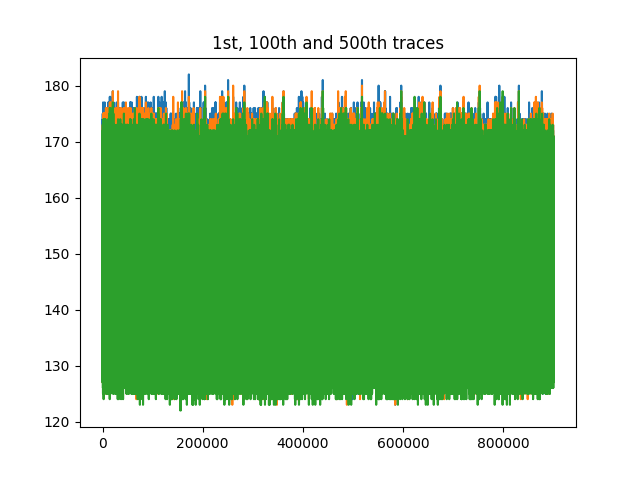

In [34]:
# Display three complete traces: an overlay of the 1st, 100th and 500th in one plot
%matplotlib widget
fig=plt.figure()
plt.title("1st, 100th and 500th traces")
plt.plot(traces[[0,99,499]].T)
plt.show()

C:\Users\stroecyr\AppData\Local\Temp\ipykernel_2392\956284211.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure()


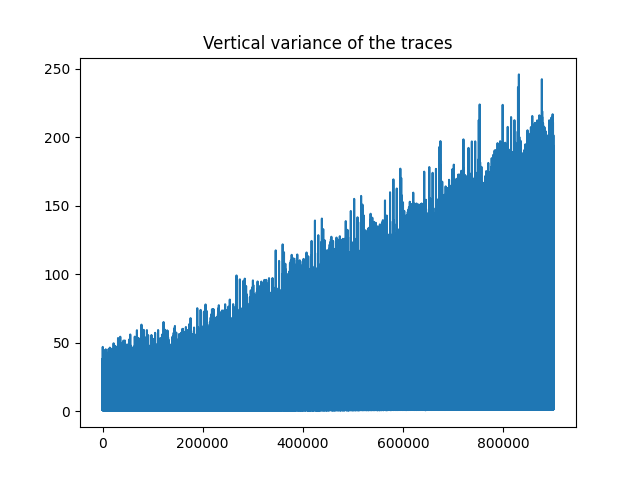

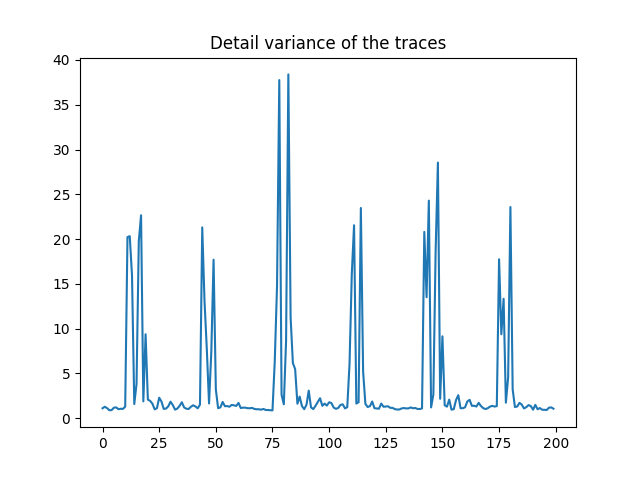

In [36]:
# Vertical variance of the traces
variance_trace  = np.var(traces, axis=0)
variance_trace.shape
fig=plt.figure()
plt.title("Vertical variance of the traces")
plt.plot(variance_trace)
plt.show()
fig=plt.figure()
plt.title("Detail variance of the traces")
plt.plot(variance_trace[0:200])
plt.show()

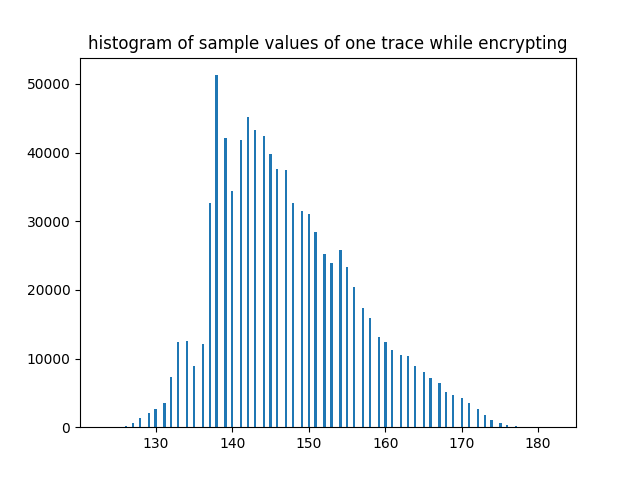

In [ ]:
# Display a histogram of sample values of one trace while encrypting
fig=plt.figure()
plt.title("Histogram of sample values of one trace while encrypting")
plt.hist(traces[0], 200)
plt.show()

fig=plt.figure()
plt.title("Detail histogram of sample values of one trace while encrypting")
plt.hist(traces[0], 200)
plt.show()

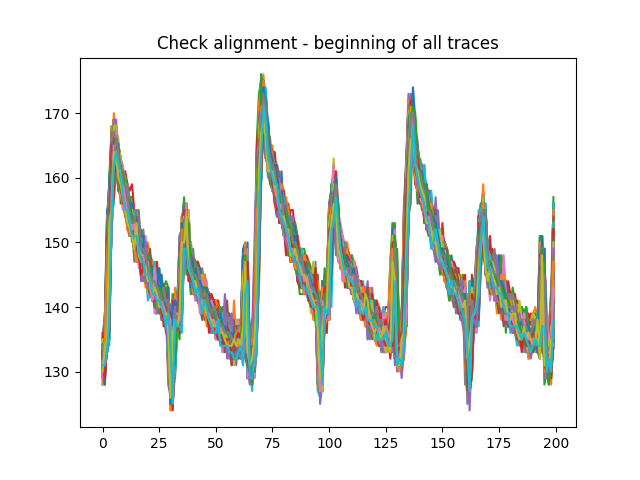

In [ ]:
# Plot a detail of the overlay of all traces
fig=plt.figure()
plt.plot(traces[:,1000:1200].T)
plt.title("Check alignment - beginning of all traces")
plt.show()

In [ ]:
# Compute the average current draw while encrypting (just for one trace)    